# StarCat Testbench

In [4]:
import numpy as np #arrays
import pyvo as vo #catalog query
import astropy as ap #votables
import importlib #reloading external functions after modification
import sys

# Self created modules
sys.path.append('../../implementation/life/data_generation/life_td_data_generation')

#self created modules
import LIFE_StarCat4 as ltc4
importlib.reload(ltc4)#reload module after changing it
import ltc4_analysis as ltc4_a
importlib.reload(ltc4_a)#reload module after changing it
from utils.io import save, load

ModuleNotFoundError: No module named 'LIFE_StarCat4'

## Comparing StarCat4 pre and post September 2025 release
Lia sais 10% of stars missing, find out why.

In [26]:
from utils.io import save, load
from astropy.io.ascii import read
import numpy as np
import importlib

import utils.analysis.catalog_comparison as cc


In [14]:
pre_release=read("../../../additional_data/catalogs/LIFE-StarCat4_dec2024.csv")
print(pre_release)

    main_id           coo_ra       ...      a_crit_s      ecliptic_pm45deg
--------------- ------------------ ... ------------------ ----------------
 PM J17198+2833    259.96283461373 ...                 --            False
SIPS J0004-2058 1.1727816434729168 ...                 --             True
 PM J16299+0453    247.47772620577 ...                 --             True
      L  372-58 53.998746505525006 ...                 --            False
 PM J23229+3717  350.7432076933599 ...                 --             True
      Ross  324  19.46095056389333 ...                 --             True
      Wolf 1506  15.32345014843625 ...                 --             True
     L  559-194  268.5124648721925 ...                 --             True
LSPM J0430+3601     67.57594475269 ...                 --             True
     LP  325-24 215.15200264917996 ...                 --             True
            ...                ... ...                ...              ...
        G 275-2    346.81

In [15]:
[post_release]=load(['StarCat4'],location='../../../additional_data/')
print(post_release)

        main_id               coo_ra       ... ecliptic_pm45deg
                               deg         ...                 
----------------------- ------------------ ... ----------------
            BD-12   662  52.33246607947125 ...             True
            LP 1032-116  335.4571804690921 ...             True
               G 138-37 247.89607291868327 ...             True
               G 144-64  316.8518218343254 ...             True
               G 141-10    276.60248715442 ...             True
            CD-22 13916 291.14264684284916 ...             True
              LP  759-6    329.30281861144 ...             True
        SIPS J2049-1944  312.3322935777066 ...             True
         PM J11523+1640    178.08549480447 ...             True
                    ...                ... ...              ...
            BD-20  6558 348.56928489779494 ...             True
           BD-20  6558B 348.56858731544924 ...             True
             LP  704-14    359.330662567

In [16]:
in_pre_but_not_in_post,temp = cc.testobject_dropout(pre_release['main_id'],post_release['main_id'])

The following objects are not part of the parent sample: 

        main_id        
-----------------------
              Ross  324
              Wolf 1506
        LSPM J0430+3601
                MCC 357
               G   5-32
              HD  31000
              HD  61214
             LP  315-53
               G   8-29
         LSR J0354+3333
                    ...
              LP  754-5
2MASS J20103539+0634367
             LP  574-21
              HD 197214
       UCAC3 122-609928
              L 1143-65
              L 1143-66
             LP  640-72
              HD 219495
              HD 219509
Length = 745 rows


In [9]:
print(temp)

    main_id    
---------------
 PM J17198+2833
SIPS J0004-2058
 PM J16299+0453
      L  372-58
 PM J23229+3717
     L  559-194
     LP  325-24
       G 177-52
       G 259-15
     LP  642-72
            ...
    CD-24 17443
    CD-24 17445
        G 275-2
      HD 218294
     AG+14 2584
      HD 218687
    BD-20  6558
   BD-20  6558B
    Wolf 1561 A
    Wolf 1561 B
Length = 3174 rows


In [17]:
#check in which step the stars get lost
#for that update the starcat4.py file to be up to date. is up to date but function for showing where stars drop out is missing
#uses localhost service so need to have new stuff up and runnin there
#recreating it

#currently issues:
#data format, csv does not have headers, xml headers are dot separated instead of comma
#previously I could just open xml in libre office calc, convert to csv, upload to google docs, transform into google sheets
#now something is no longer working correctly with xml to libre office calc conversion. headers get lost. they sometimes reappear when creating csv but is not correct then (dot separated and all in one cell)
#solution: create csv (ecsv directly from xml through code here)
from catalog import starcat4 as ltc4
cat = ltc4.starcat_creation(30,test_objects=None)

#code runs without test objects. to do:
# - run with test objects
# - get correct data type again, also ecsv seems to be strange, strings have lots of "" around them and opening into libre office not working -> update libre office
# - get starcat4 integration test working again

In [11]:
importlib.reload(ltc4)#reload module after changing it

cat=ltc4.starcat_creation(30,test_objects=in_pre_but_not_in_post)
#most objects are not in the query (about 600)
#about 30 I lose in luminocity class
#about 30 I lose in multiplicity


in step query:
The following objects are not part of the parent sample: 

    main_id    
---------------
      Ross  324
      Wolf 1506
LSPM J0430+3601
        MCC 357
       G   5-32
      HD  31000
     LP  315-53
       G   8-29
 LSR J0354+3333
    LP  414-139
            ...
     LP  128-32
    2MUCD 10984
 PM J11240+3808
      HD 105065
      L  269-24
      LP  754-5
     LP  574-21
      HD 197214
      L 1143-66
     LP  640-72
Length = 675 rows
in step main sequence temperature class:
The following objects are not part of the parent sample: 

       main_id        
----------------------
2MASSW J1421314+182740
            LP  739-36
              G  82-32
in step main sequence luminocity class:
The following objects are not part of the parent sample: 

  main_id   
------------
   HD  61214
   HD 109952
   HD 203040
   HD 132648
   HD 170573
   HD  47252
   *  89 Leo
   HD 151995
   HD 192961
   HD  27274
         ...
   HD 176986
CPD-64  4178
   HD 290054
   HD  97343
   HD

In [ ]:
#check for those stars not in query why by looking at their db entry.
#don't I already have a code for this? The things I just did?
l=list(in_pre_but_not_in_post)
import life_td as ltd
importlib.reload(ltd)
provider_tables_dict, database_tables= ltd.load_life_td(path_prefix="../")

In [35]:
row = database_tables['star_basic'][np.where(database_tables['star_basic']['main_id']=="G   5-32")]
print(row['binary_flag','binary_source_idref'])
print(database_tables['sources'][np.where(database_tables['sources']['source_id']==568)])
#Ross  324 has a binary flag true but no companion or child given

binary_flag binary_source_idref
----------- -------------------
       True                 568
        ref         provider_name source_id
------------------- ------------- ---------
2016A&A...595A...1G          Gaia       568


In [27]:
importlib.reload(cc)
cc.detail_criteria(database_tables, l, verbose=True)

#output does not look nice in summary -> systems without child

tbd: file starcat4 analysis where this code is used to give specific reason why a given object was not included into the cat4
system object but with found child object BD+48  1829
child_main_id
-------------
 BD+48  1829b
system object but with found child object G 192-15
 child_main_id 
---------------
NAME G 192-15 b
NAME G 192-15 c
 NAME G 192-15b
 NAME G 192-15c
system object but with found child object BD+19   451
child_main_id
-------------
  TOI-5084.01
system object but with found child object LP  197-37
 child_main_id  
----------------
WDS J02409+4453A
WDS J02409+4453B
system object but with found child object G   9-40
child_main_id
-------------
 NAME G 9-40b
system object but with found child object L  225-57
 child_main_id  
----------------
WDS J02344-5306A
WDS J02344-5306B
system object but with found child object Wolf  346
child_main_id
-------------
  TOI-5388.01
system object but with found child object BD+02  2098
child_main_id
-------------
 BD+02  2098b
     GJ 328

## StarCat4 creation

In [ ]:
distance_cut_in_pc=30

StarCat4=ltc4.StarCat_creation(distance_cut_in_pc,querying=True)
#[StarCat4]=load(['StarCat4'],location='data/')

In [ ]:
ap.io.ascii.write(StarCat4, 'data/LIFE-StarCat4.csv',format='csv', delimiter=',',overwrite=True)

In [ ]:
print(StarCat4[np.where(StarCat4['binary_flag']=='False')])
#3906
#3919 why bigger when I now kicked out non V lum classes? maybe because I also fixed the d instead of V bug
#also 10 stars from multiples to singles moved. no means I lost 10 multiples because of the lum class but got 20 stars because of the bugfixes

## HPIC

In [ ]:
import astropy as ap

In [ ]:
#downloaded at https://exoplanetarchive.ipac.caltech.edu/docs/MissionStellar.html
# unpacked into full_HPIC.txt + others
#converted into csv
import astropy as ap
def create_hpic():
    HPIC= ap.io.ascii.read('data/full_HPIC.csv')
    print(HPIC)
    print(HPIC.colnames)
    HPIC=HPIC[np.where(HPIC['sy_dist']!='null')]#143 null values in distance
    HPIC=HPIC[np.where(HPIC['st_spectype']!='null')]#of those about 2600 have no spectral type given
    HPIC['sy_dist']=HPIC['sy_dist'].astype(float)
    return HPIC

In [ ]:
HPIC=create_hpic()

In [ ]:
print(len(HPIC))

In [ ]:
#now create final plot

## StarCat4 comparison

In [16]:
import importlib
import ltc4_analysis as ltc4_a
import analysis as la

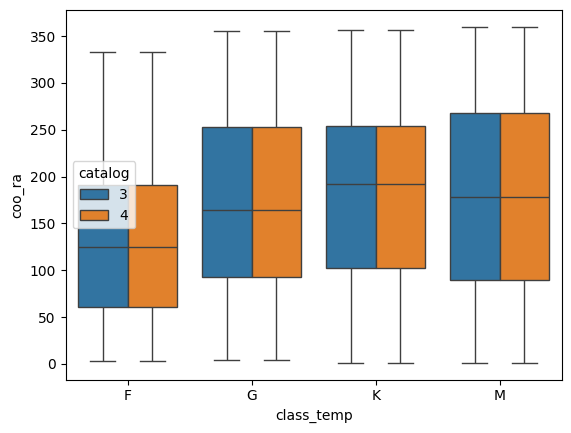

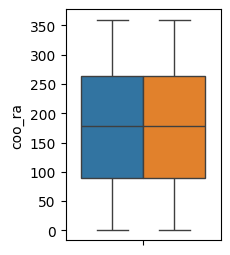

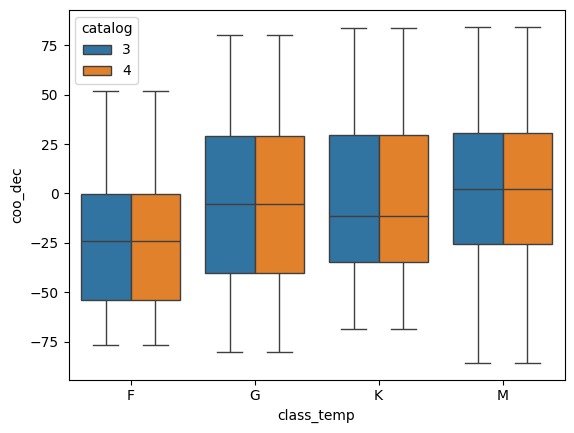

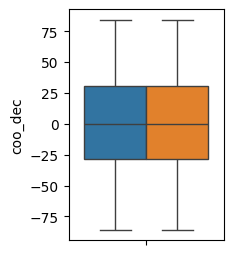

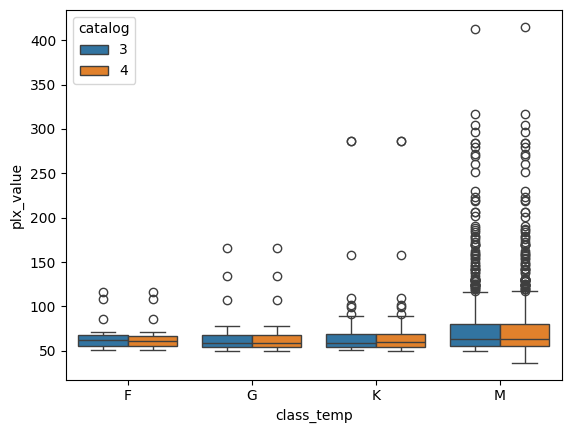

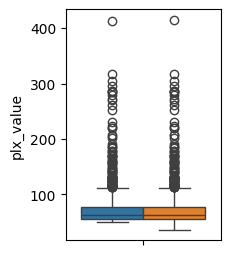

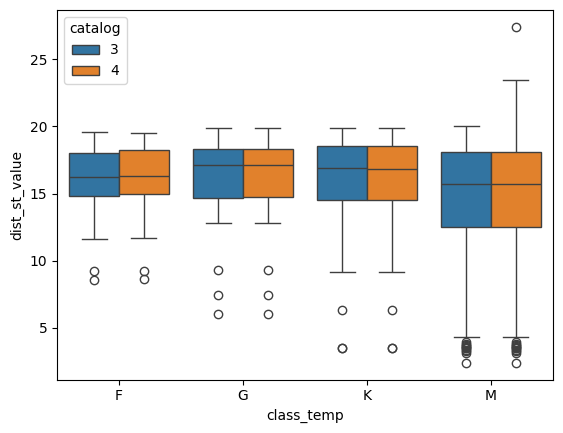

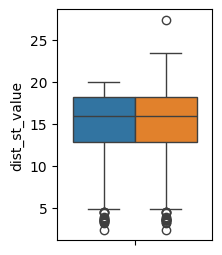

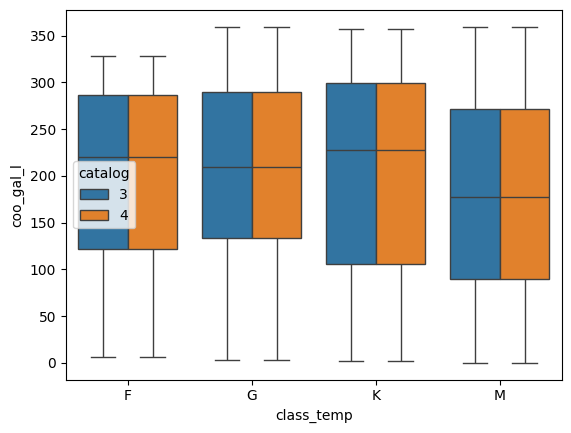

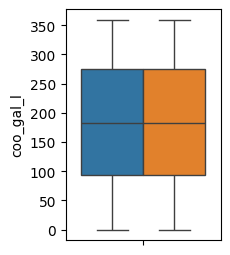

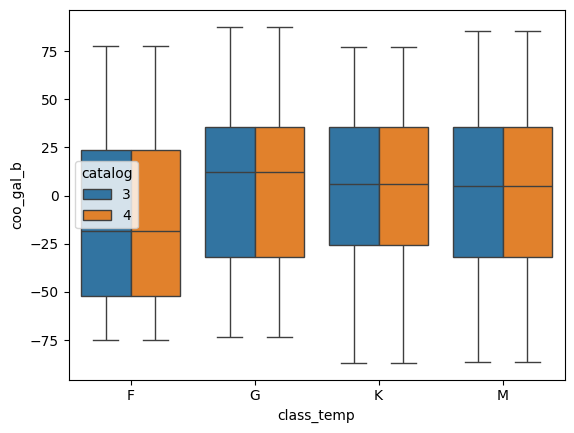

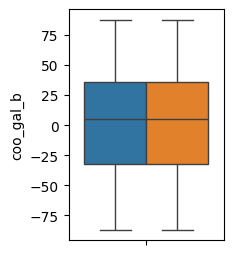

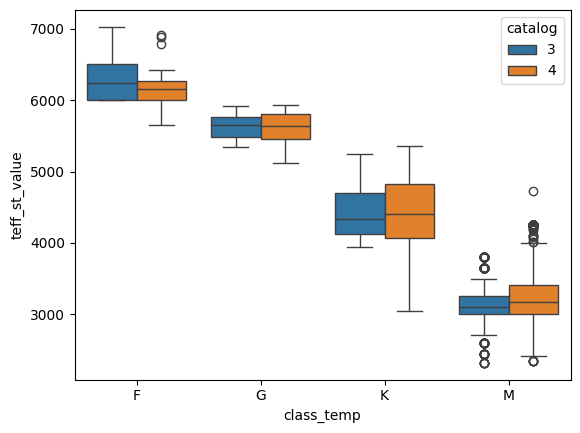

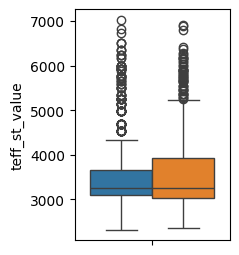

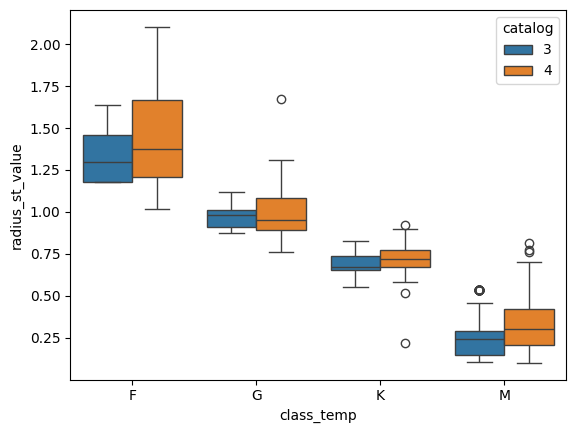

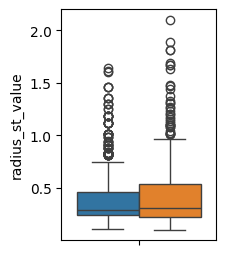

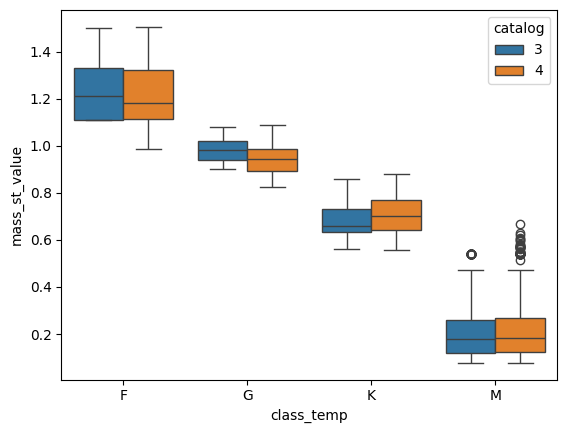

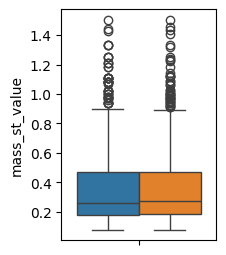

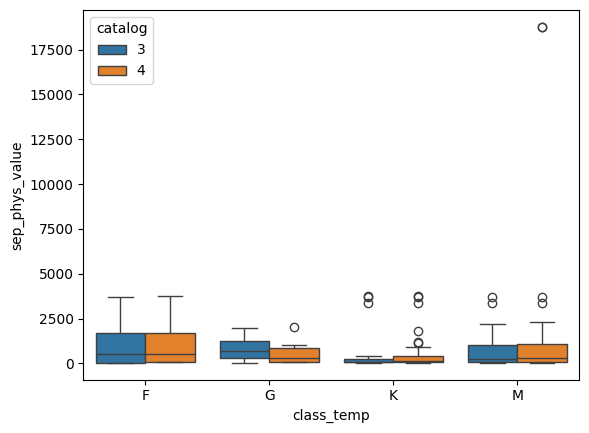

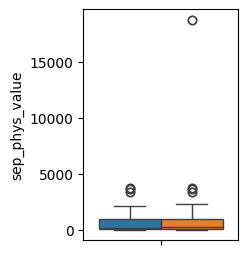

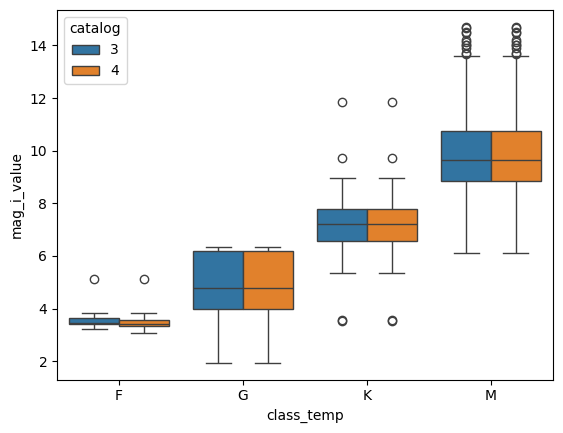

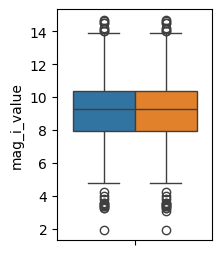

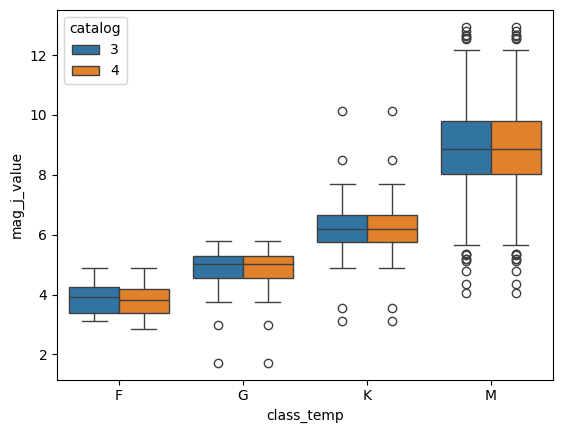

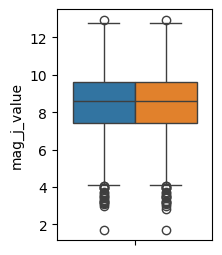

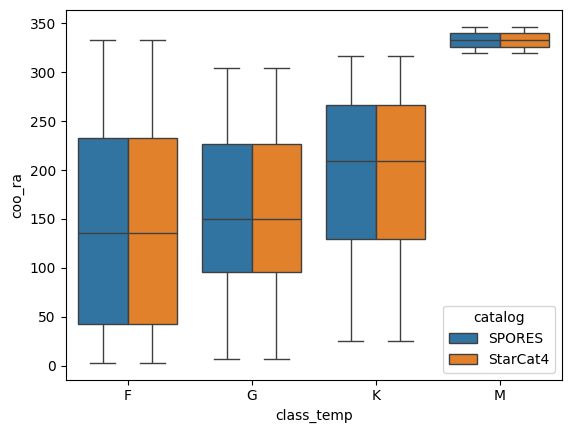

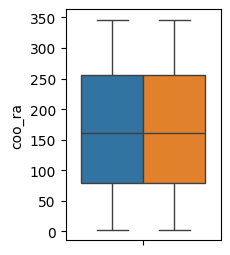

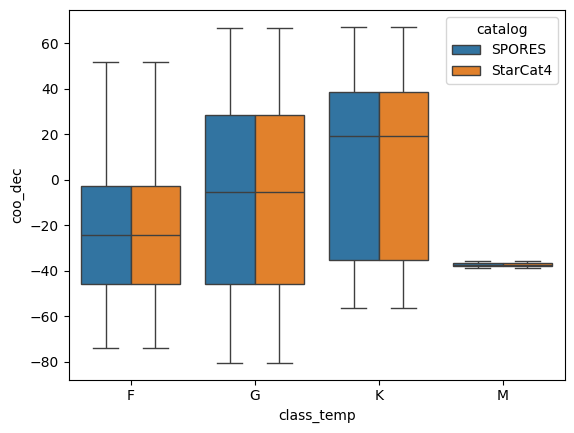

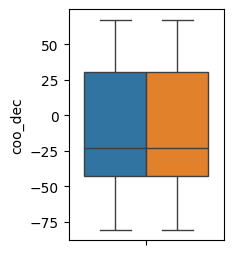

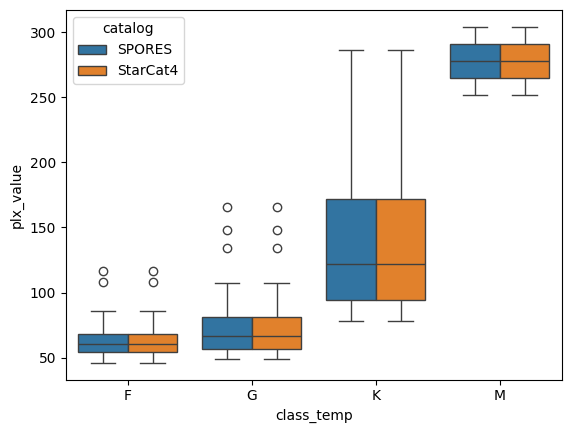

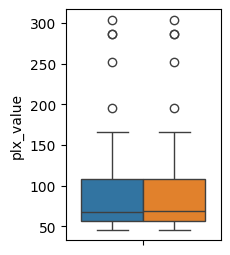

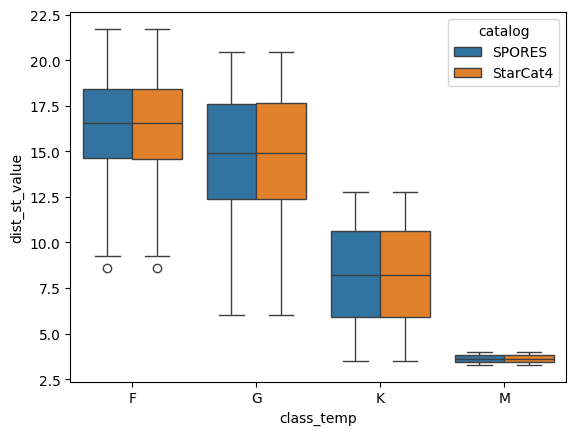

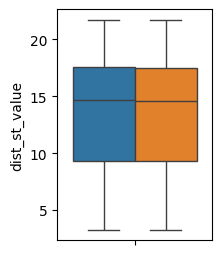

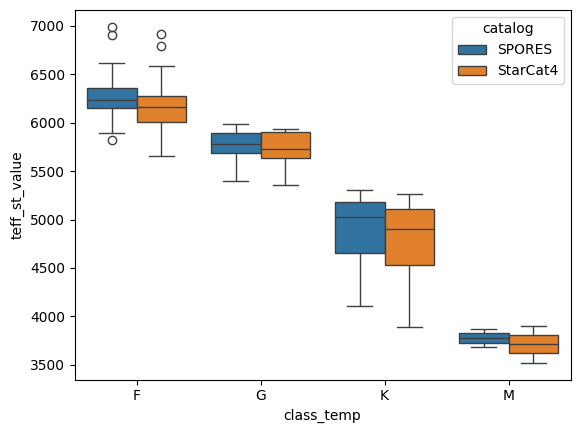

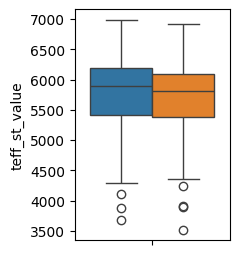

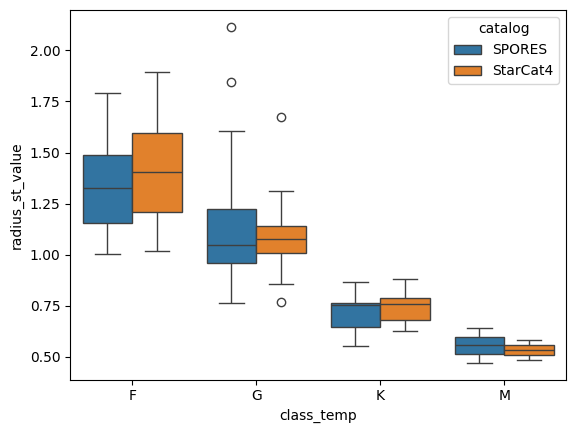

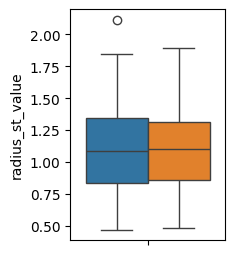

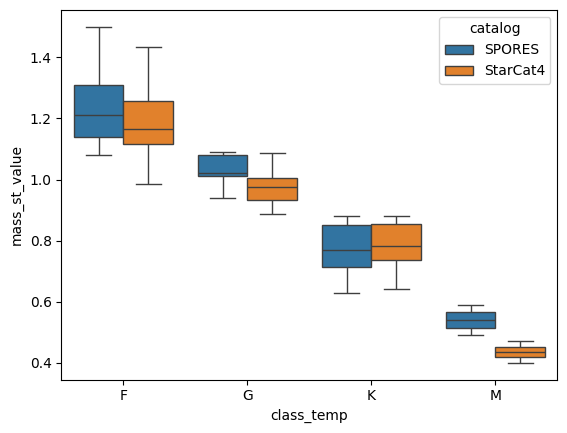

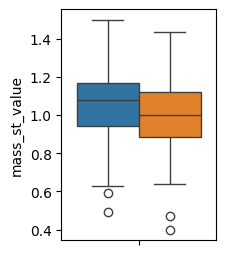

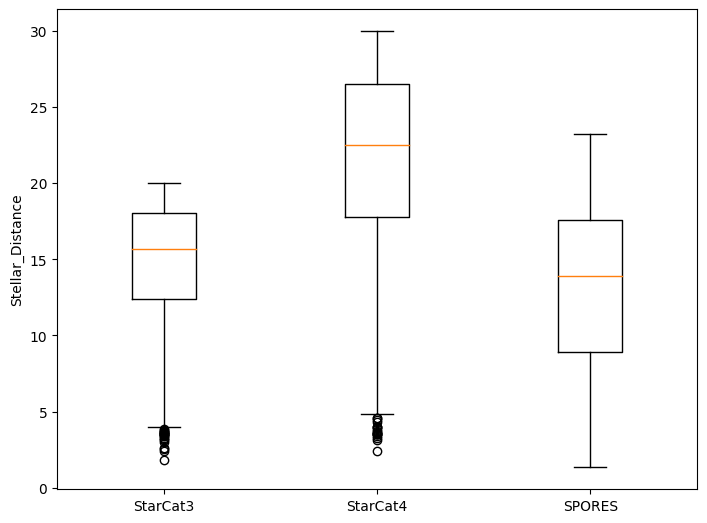

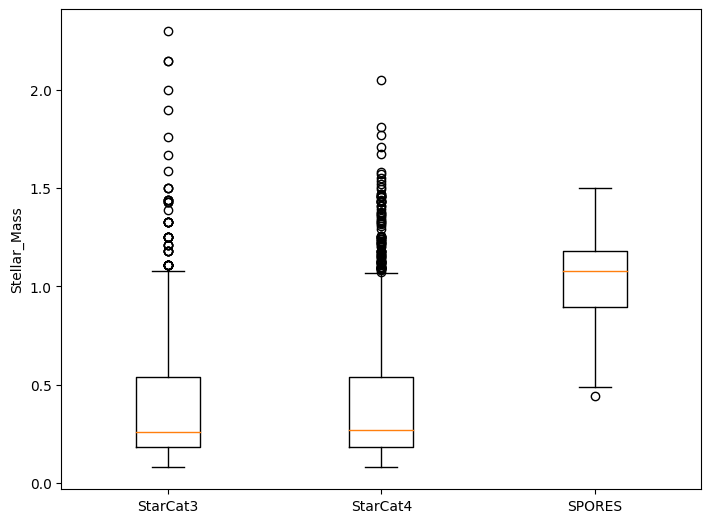

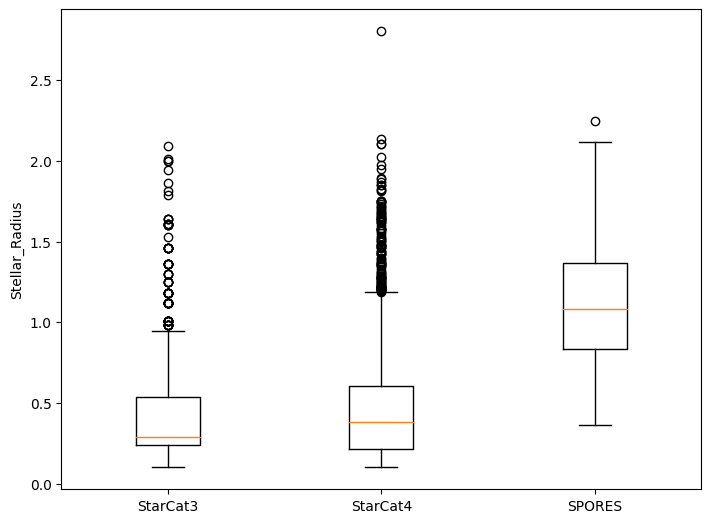

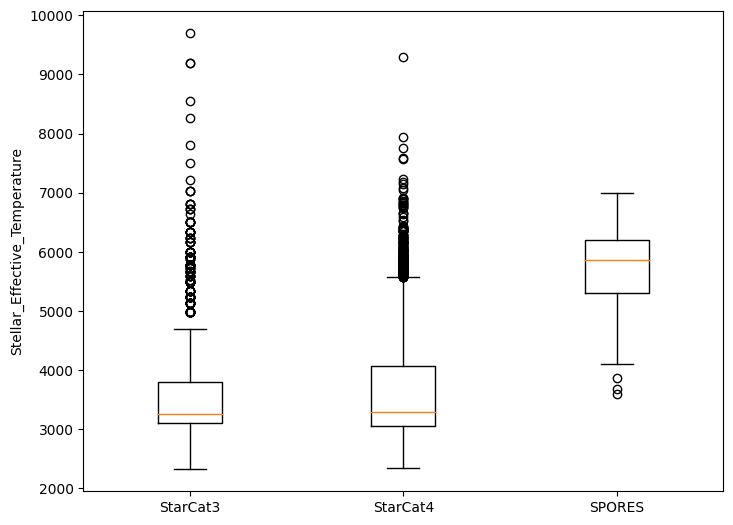

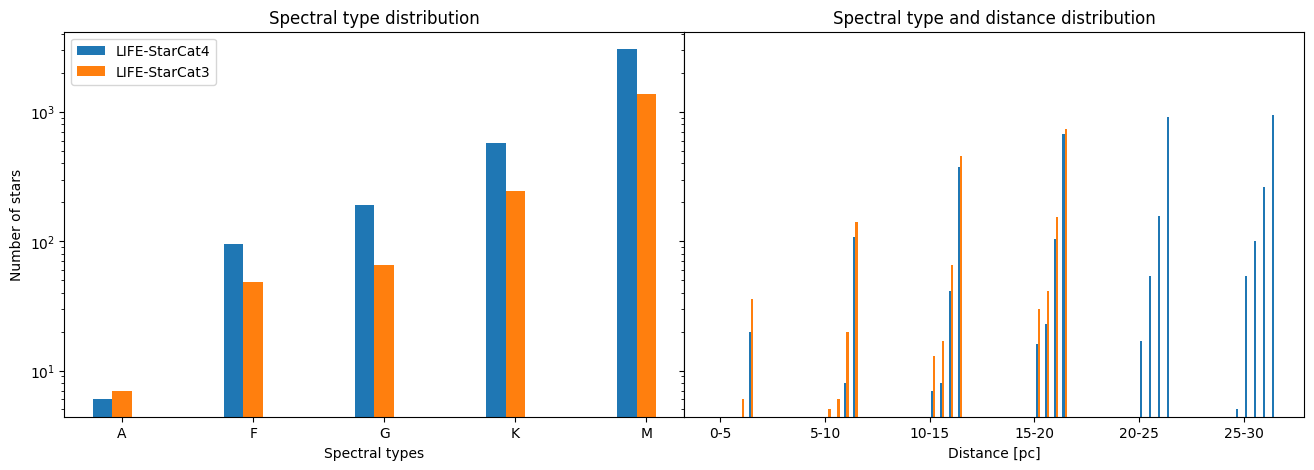

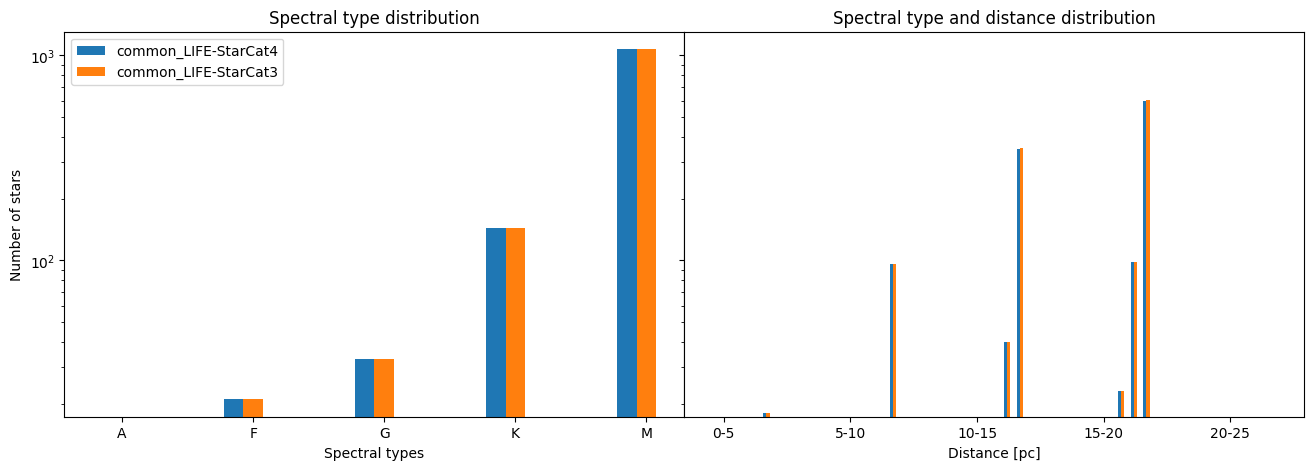

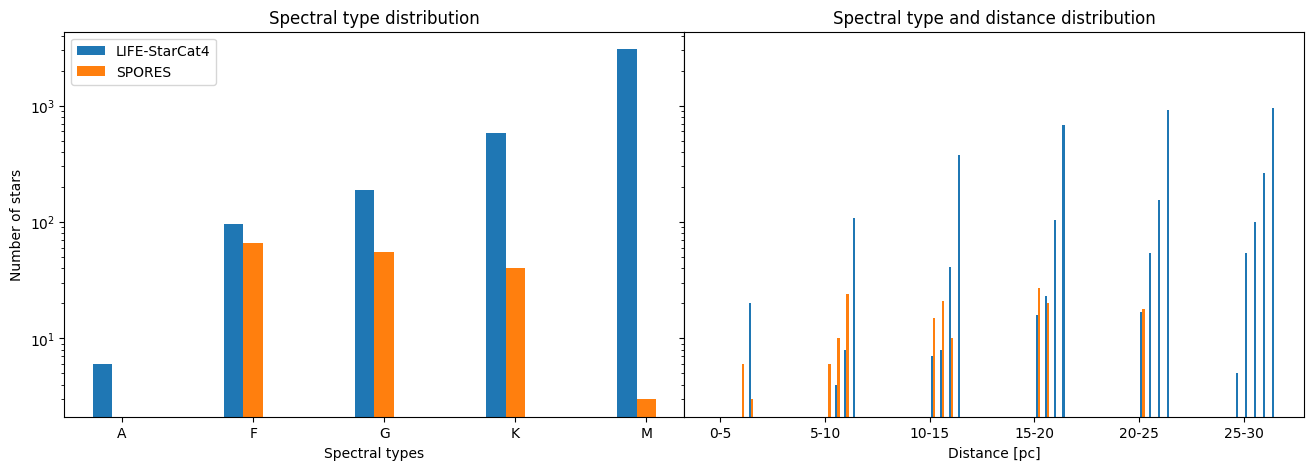

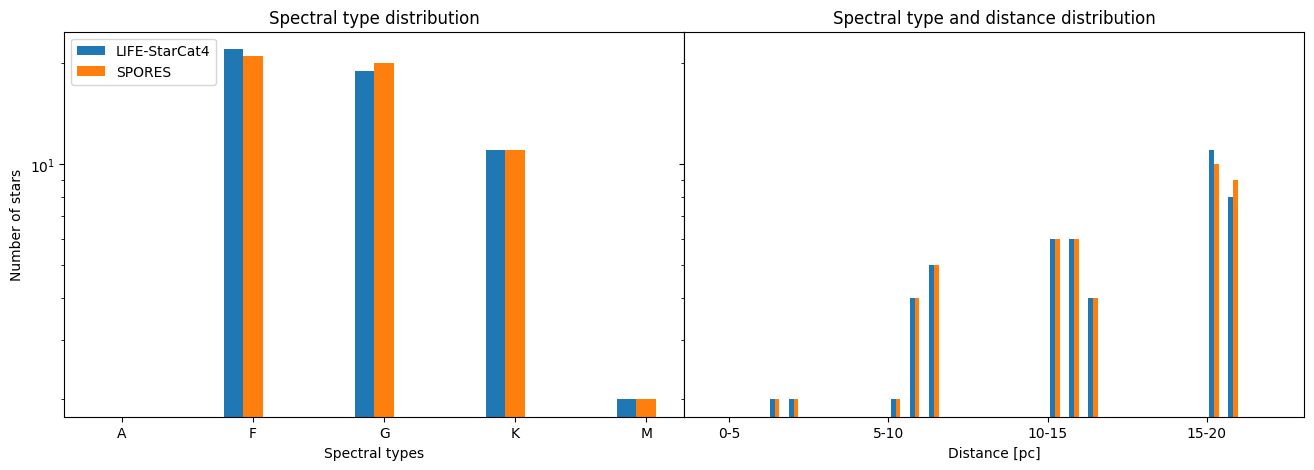

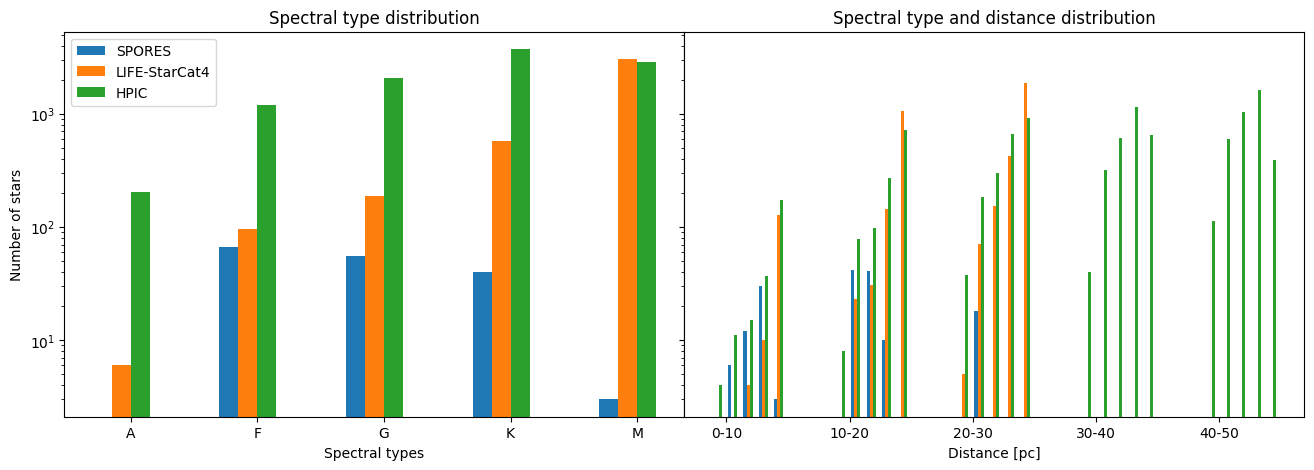

In [9]:
importlib.reload(ltc4_a)#reload module after changing it

ltc4_a.ltc4_comparison()

In [2]:
#load the spectral_type and distance samples
[starcat]=load(['StarCat4'],location='data/')
[hpic]=load(['hpic'],location='data/')
[hwo]=load(['hwo'],location='data/')


In [10]:
#add db ms stars
from provider.utils import query

def db_ms_stars():
    adql_query="""
    SELECT o.main_id, sb.dist_st_value, sb.sptype_string, sb.class_lum, sb.class_temp
    FROM life_td.star_basic AS sb
    JOIN life_td.object AS o ON sb.object_idref=o.object_id
    WHERE o.type = 'st' """
    service='http://dc.zah.uni-heidelberg.de/tap'
    cat=query(service,adql_query)

    ms_tempclass=np.array(['O','B','A','F','G','K','M'])
    cat_ms_tempclass=cat[np.where(np.in1d(cat['class_temp'],ms_tempclass))]

    ms_lumclass=np.array(['V'])
    cat_ms_lumclass=cat_ms_tempclass[np.where(np.in1d(cat_ms_tempclass['class_lum'],ms_lumclass))]

    return cat_ms_lumclass

In [11]:
all_ms_stars = db_ms_stars()

15688
Removing objects whose temperature class is not in OBAFGKM...
6195
6032


In [23]:
print(all_ms_stars)

        main_id         dist_st_value sptype_string class_lum class_temp
                              pc                                        
----------------------- ------------- ------------- --------- ----------
            *  61 Cyg B           3.5           K7V         V          K
            *  61 Cyg A           3.5           K5V         V          K
              HD 203454         26.69           F8V         V          F
              HD 196850         27.26           G1V         V          G
               G 209-38         16.36          M3.5         V          M
        LSPM J2101+3957         23.98         M5.22         V          M
               G 212-12         29.61         M2.5V         V          M
            L 1578-44 A         20.79         M0.5V         V          M
               GAT 1383         14.51         M5.5V         V          M
              HD 205286         29.09            K2         V          K
                    ...           ...           ...

In [12]:
db_stars=all_ms_stars['sptype_string','dist_st_value']
db_stars.rename_columns(['sptype_string','dist_st_value'],['spec','dist'])

In [ ]:
starcat_specdist=starcat['sptype_string','dist_st_value']
starcat_specdist.rename_columns(['sptype_string','dist_st_value'],['spec','dist'])
hwo_specdist=hwo['st_spectype','sy_dist']
hwo_specdist.rename_columns(['st_spectype','sy_dist'],['spec','dist'])
hpic_specdist=hpic['st_spectype','sy_dist']
hpic_specdist.rename_columns(['st_spectype','sy_dist'],['spec','dist'])

In [27]:
labels=['LIFETD','StarCat','HPIC','SPORES']

stellar_catalogs=[db_stars,starcat_specdist,hpic_specdist,hwo_specdist]

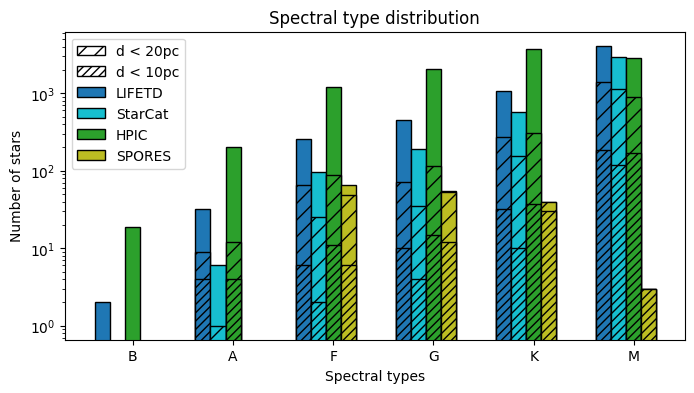

In [28]:
importlib.reload(la)#reload module after changing it

la.spectral_type_histogram_catalog_comparison(stellar_catalogs,labels,path='plots/rnaas.png')
#would look nicer if figure were longer and bars broader but the time it would take to make that is noth worth it

## why are almost all  LIFETD M stars in starcat?
Mark: I am slightly surprised by the completeness of the M star sample, i.e., almost all M stars within 10pc in LIFETD are in StarCat. I guess I was expecting a larger fraction of binaries to be excluded. It would be great if this exclusion fraction for different spectral types was understandable given what we know about binary statistics and the cuts used when going from LIFETD -> StarCat.

In [ ]:
#so need to look into the M stars that get queried for the starcat creation but don't make it into the final catalog.

In [ ]:
#either we miss M stars or we include a really high fraction of binaries
#I don't think we miss (many) m stars as it is about the same as in hpic

In [68]:
# a reason for few m stars being kicked out could be that they are almost all V (assumed)
# -> plot db m star histogram of luminocity class
m_stars=all_ms_stars[np.where(all_ms_stars['class_temp']=='M')]
print(m_stars['class_lum'][np.where(m_stars['class_lum']!='V')])#all m stars are assumed to be luminocity class V

class_lum
---------


In [ ]:
#I can do it by feeding m stars into the starcat function but first I need to make sure function is up to date with tutorial.

In [85]:
from LIFE_StarCat4 import StarCat_creation
# and because of their small mass they most often fit the stability criterion.
# -> show how many M stars fall out of stability criterion
distance=20.
test_list=all_ms_stars[np.where(all_ms_stars['dist_st_value']<distance)]
star='G'
spec_testlist=test_list[np.where(test_list['class_temp']==star)]


print(spec_testlist)
StarCat_creation(distance,spec_testlist['main_id'],details=True,querying=True)
#m_star_statistics: initial 195: temp 0, lum 0, higher order 0, mulit parents 24,   nosep 5,   both components 28,  stability 10,all128
#k star statistics: initial 32:       0      0               0                10,         0                    12,            all10
# g... all 4
#20pc
#G 71 but still only 35 met all criteria. both or multiple parent most kick out
#M 1431 again multiple planets and both components highest losses but left with 1200

#fazit: m stars higher number -> m stars more often companions to m stars. m stars go through most criteria (V, both components). higher order multiples only concern but if there are bright stars in higher order multiples we might not see the m stars

  main_id   dist_st_value sptype_string class_lum class_temp
                  pc                                        
----------- ------------- ------------- --------- ----------
  HD 193664         17.48           G3V         V          G
  HD 220140         18.95           G9V         V          G
  * iot Per         10.58           G0V         V          G
  HD 154345         18.27            G9         V          G
  HD 128642          19.7            G5         V          G
  * i Boo B         12.81           G9:         V          G
  HD  62613         17.16            G9         V          G
* pi.01 UMa         14.44         G0.5V         V          G
  *  15 LMi         18.82        G0.5Va         V          G
  HD 222335         18.28         G9.5V         V          G
        ...           ...           ...       ...        ...
  * iot Pav         17.79           G0V         V          G
  HD 189567         17.93           G2V         V          G
  HD 207129         15.5

main_id,coo_ra,coo_dec,plx_value,dist_st_value,sptype_string,coo_gal_l,coo_gal_b,teff_st_value,mass_st_value,radius_st_value,binary_flag,mag_i_value,mag_j_value,class_lum,class_temp,parent_main_id,sep_ang_value,sep_phys_value,a_crit_s,ecliptic_pm45deg
,deg,deg,mas,pc,,deg,deg,K,solMass,solRad,,,,,,,arcsec,AU,AU,
str30,float64,float64,float64,float64,str23,float64,float64,float64,float64,float64,str5,float64,float64,str3,str1,str24,float64,float64,float64,str5
[PS78] 190,20.68350554797,-25.78546799843,51.0827,19.58,M3.0Ve,203.841884646781,-82.86917469615712,3350.0,0.27,0.34765395522117615,False,10.5,9.133999824523926,V,M,,--,--,--,True
CD-53 570,42.54056092487708,-53.13896972616194,75.7208,13.21,M1.5,270.88104593586706,-55.961740709192206,3525.0,0.47,0.5584958791732788,False,8.54699993133545,7.348999977111816,V,M,,--,--,--,False
SIPS J1141-3624,175.339671002995,-36.409600673629726,115.0835,8.69,M5,287.50928573902655,24.354518339242155,3080.90087890625,0.123,0.22812902927398682,False,10.100000381469727,8.489999771118164,V,M,,--,--,--,True
Ross 594,67.60538180741459,39.849838856853346,91.8429,10.89,M5V,161.99869238963973,-5.865875000580491,2864.0,0.123,0.156,False,10.800000190734863,9.11299991607666,V,M,,--,--,--,True
BD+40 45,4.276558743065417,40.94829745093833,68.0846,14.69,K7,115.97531165390308,-21.45924819277628,4251.0,0.6509712934494019,0.74996018409729,False,--,6.385000228881836,V,K,,--,--,--,True
SIPS J0004-2058,1.1727816434729168,-20.974966448961666,66.4805,15.04,M7.0,60.408965308631814,-77.69087756069707,2630.0,0.088,0.116,False,15.649999618530273,12.404000282287598,V,M,,--,--,--,True
LP 321-16,129.85524302387,29.88831238714,51.1912,19.53,M3.5,194.06238940519123,35.27337006186216,3165.0,0.27,0.23909832537174225,False,--,10.3100004196167,V,M,,--,--,--,True
L 372-58,53.998746505525006,-44.51270300849139,272.1615,3.67,M5.5V,251.86977942184183,-52.90488708591616,4250.0,0.123,0.156,False,9.470000267028809,7.5229997634887695,V,M,,--,--,--,False


In [78]:
g_stars=all_ms_stars[np.where(all_ms_stars['class_temp']=='G')]


In [ ]:
# also very close in m stars would not be observed at further distances as they are too faint and those are the ones we would exclude in the starcat
# -> show m star separation plotted against distance

## why does hpic have more stars in 10 and 20 pc area than lifetd?
maybe systems as well as stars included?

In [29]:
HPIC= ap.io.ascii.read('data/full_HPIC.csv')

In [30]:
    print(HPIC)
    print(HPIC.colnames) # -> no apparent star vs system column

         star_name                 ra            dec       ... sy_planets_flag hostname
---------------------------- -------------- -------------- ... --------------- --------
               TIC 459832522     213.915338      19.182202 ...               0     null
               TIC 245873777      68.980213      16.509084 ...               1  alf Tau
               TIC 272314138     187.791407      -57.11318 ...               0     null
               TIC 322899250     101.286998     -16.715745 ...               0     null
               TIC 368326352      79.172437      45.997898 ...               0     null
               TIC 471011144     219.903981     -60.837157 ...               0     null
               TIC 280310048     114.825217       5.224936 ...               0     null
               TIC 471011145     219.910043     -60.833976 ...               0     null
               TIC 157587146     279.234764      38.783747 ...               0     null
               TIC 423088367    

In [34]:
print(HPIC['star_name','simbad_name','st_spectype'][np.where(HPIC['simbad_name']=='null')])
#some TIC / GAIA DR3 stars without simbad names but they have no spectral type given so not the ones I am looking for

         star_name           simbad_name st_spectype
---------------------------- ----------- -----------
                TIC 91329515        null        null
                TIC 67906570        null        null
               TIC 471015557        null        null
               TIC 471013491        null        null
                TIC 97600027        null        null
                TIC 86519791        null        null
               TIC 304379559        null        null
                TIC 32542038        null        null
               TIC 471012437        null        null
               TIC 357401721        null        null
               TIC 185994898        null        null
                         ...         ...         ...
GAIA DR3 1980095479569917952        null        null
GAIA DR3 2026285138455971200        null        null
GAIA DR3 3103325046315850624        null        null
GAIA DR3 3147424915811731200        null        null
GAIA DR3 3385254533644096384        null      

In [43]:
hpic= load(['hpic'],location='data/')[0]

In [48]:
different_stars=hpic
print(hpic['star_name','simbad_name','st_spectype','sy_dist'][np.where(hpic['sy_dist']<10)])
#for plot I just took first letter of st_spectype and tested if is ms star

         star_name            simbad_name  st_spectype     sy_dist     
---------------------------- ------------- ----------- ----------------
               TIC 322899250     * alf CMa     A0mA1Va 2.63706125893305
               TIC 471011144   * alf Cen B         K1V 1.34749097181049
               TIC 280310048     * alf CMi  F5IV-V+DQZ 3.49735949358234
               TIC 471011145   * alf Cen A         G2V 1.34749097181049
               TIC 157587146     * alf Lyr        A0Va 7.75614674629644
                TIC 70257116     * alf Aql        A7Vn 5.12952038984355
                TIC 47552789     * alf PsA         A4V  7.7035667514059
               TIC 267211065     * bet Hyi         G0V           7.4783
               TIC 341873045     * chi Dra         F7V              8.3
               TIC 252191219     * mu. Cas        G5Vb           7.6753
               TIC 154385728     HD 156384     K3V+K5V  6.9710700592541
                         ...           ...         ...          

In [49]:
print(db_stars[np.where(db_stars['dist']<10)])
# -> 4 missing, looking at hpic there I have some spectral type binaries in
#would need to let spectral type storting from db pipeline go over it instead of less sofisticated version
#one more thing I can try is compare sim id and give out the ones that don't match

 spec  dist
        pc 
------ ----
   K7V  3.5
   K5V  3.5
M4.0Ve 5.05
  M3.9 8.13
   K3V 6.54
   M3V 4.01
   M4V  4.0
   M6V 4.66
 M3.5V 3.52
   M3V 3.52
   ...  ...
 M2/3V 4.97
   M1V 3.97
   K5V 3.64
   G0V 7.46
 F9.5V 8.61
  M3.5 7.11
   K2V  8.2
   K2V 8.19
    M9 8.88
 M5.5V 3.67
   G6V 6.04
Length = 247 rows


In [57]:
cat1=all_ms_stars[np.where(all_ms_stars['dist_st_value']<10)]
cat1_idname='main_id'
cat2=hpic[np.where(hpic['sy_dist']<10)]
cat2_idname='simbad_name'
common=cat1[np.where(np.in1d(cat1[cat1_idname],cat2[cat2_idname]))]
not_in_cat1=cat2[np.where(np.invert(np.in1d(cat2[cat2_idname],cat1[cat1_idname])))]
not_in_cat2=cat1[np.where(np.invert(np.in1d(cat1[cat1_idname],cat2[cat2_idname])))]
common2=cat2[np.where(np.in1d(cat2[cat2_idname],cat1[cat1_idname]))]

In [52]:
print(cat1)

    main_id     dist_st_value sptype_string class_lum class_temp
                      pc                                        
--------------- ------------- ------------- --------- ----------
    *  61 Cyg B           3.5           K7V         V          K
    *  61 Cyg A           3.5           K5V         V          K
      V* EV Lac          5.05        M4.0Ve         V          M
IRAS 21500+5903          8.13          M3.9         V          M
      HD 219134          6.54           K3V         V          K
     HD 239960A          4.01           M3V         V          M
     HD 239960B           4.0           M4V         V          M
       G 208-45          4.66           M6V         V          M
      HD 173740          3.52         M3.5V         V          M
      HD 173739          3.52           M3V         V          M
            ...           ...           ...       ...        ...
      HD 204961          4.97         M2/3V         V          M
      V* AX Mic          

In [53]:
print(common)

    main_id     dist_st_value sptype_string class_lum class_temp
                      pc                                        
--------------- ------------- ------------- --------- ----------
    *  61 Cyg B           3.5           K7V         V          K
    *  61 Cyg A           3.5           K5V         V          K
      V* EV Lac          5.05        M4.0Ve         V          M
IRAS 21500+5903          8.13          M3.9         V          M
      HD 219134          6.54           K3V         V          K
     HD 239960A          4.01           M3V         V          M
     HD 239960B           4.0           M4V         V          M
       G 208-45          4.66           M6V         V          M
      HD 173740          3.52         M3.5V         V          M
      HD 173739          3.52           M3V         V          M
            ...           ...           ...       ...        ...
      HD 191849          6.16           M0V         V          M
      HD 204961          

In [66]:
print(not_in_cat1['star_name','simbad_name','st_spectype','sy_dist'][np.where(not_in_cat1['tyc_name']=='null')])

         star_name             simbad_name    st_spectype     sy_dist     
---------------------------- ---------------- ----------- ----------------
               TIC 283784587         G  41-14       M3.5V 6.77231477719084
                TIC 42630152         G 207-16         M3V              8.3
               TIC 142305546      LP  993-116          M5              7.0
                TIC 98796342 NAME BD-17 588BC       M2.5V 7.15819613457409
               TIC 460067872      * mu.02 Her       M3.5V 8.33732318878174
               TIC 130370378      CD-44  3045       M3.5V 8.04019165039063
               TIC 185617406      CD-32  5613       DA5.5 8.51454544067383
               TIC 440109718        V* GQ And       M3.5V 3.56197476387024
               TIC 249667452         G 119-36         M5V 9.72555160522461
               TIC 274127410         G 208-44      M5.5Ve           4.6913
               TIC 747459985      * alf CMa B       DA1.9 2.67014694213867
                TIC 29928

# Outdated

## aitoff plots

In [ ]:
def aitoff(StarCat4,ang=45):
    #not working
    #transforming my ra data to fit aitof x axis limits


    #aitoff plot
    #dec(ra) with cutoff example 45 deg
    plt.figure()
    plt.subplot(projection="aitoff")
    ra=np.linspace(-150,150)
    plt.scatter(StarCat4['coo_ra'],StarCat4['coo_dec'],s=2)
    ecliptic=np.zeros(len(ra))
    plt.plot(ra,ecliptic,color='r',label='ecliptic')
    plt.plot(ra,ang+ecliptic,color='y',label='+45deg')
    print(ang+ecliptic)
    #plt.plot(ra,-ang+ecliptic,color='y',label='-45deg')
    #s is dot size
    plt.title("Aitoff")
    plt.grid(True)
    plt.xlabel('RA')
    plt.ylabel('DEC')
    plt.legend()
    plt.savefig('plots/aitoff', dpi=300)
    plt.show()
    #something is wrong with my plot. the declination coordinates are not right given the axis labels.
    #ah issue is that is not from 0 to 360 but from -180 to 180
    return

def ravsdec(StarCat4,ang=45):
    #not working
    #maybe include
    plt.figure()
    ra=np.linspace(0,360)
    plt.scatter(StarCat4['coo_ra'],StarCat4['coo_dec'],s=2)
    #plt.scatter(within45deg['coo_ra'],within45deg['coo_dec'],s=2)
    #ecliptic plane in equatorial coordinates
    ecliptic=(23.4)*np.sin(2*np.pi*ra/360)
    plt.plot(ra,ecliptic,color='r',label='ecliptic')
    plt.plot(ra,ang+ecliptic,color='y',label='+45deg')
    plt.plot(ra,-ang+ecliptic,color='y',label='-45deg')
    #had to correct 2*pi/360 formular from email and found out that my cutoff also not right
    plt.xlabel('RA [deg]')
    plt.ylabel('DEC [deg]')
    plt.legend()
    plt.savefig('plots/quasi_aitoff', dpi=300)
    plt.show()
    return

def skymap(StarCat4,ang=45):
    #not working
    # Create now a sky map of the results

    # Set a dark background (the night sky is ... dark)
    #plt.style.use('dark_background')

    # Create a figure and then apply the aitoff projection
    plt.figure(figsize=(12, 8))
    plt.subplot(projection="aitoff")

    ra=np.linspace(0,360)
    plt.scatter(StarCat4['coo_ra'],StarCat4['coo_dec'],s=2)
    ecliptic=np.zeros(len(ra))
    plt.plot(ra,ecliptic,color='r',label='ecliptic')
    plt.plot(ra,ang+ecliptic,color='y',label='+45deg')
    print(ang+ecliptic)
    # Replace the standard x ticks (longitude) with the ecliptic coordinates
    plt.xticks(ticks=np.radians([-150, -120, -90, -60, -30, 0, \
                             30, 60, 90, 120, 150]),
           labels=['150°', '120°', '90°', '60°', '30°', '0°', \
                   '330°', '300°', '270°', '240°', '210°'])

    # Set the axes labels
    plt.xlabel('Eclip. long. in deg')
    plt.ylabel('Eclip. lat. in deg')

    plt.title('Aitoff', fontsize=10)
    # Create a legend and grid
    plt.legend()
    plt.grid(True)

    # Save the figure
    plt.savefig('eclipj2000_sky_map.png', dpi=300)
    return

In [ ]:
print('the following plots are still work in process')
aitoff(StarCat4,45)
ravsdec(StarCat4,45)
skymap(StarCat4)

## t-test

In [ ]:
import matplotlib.pyplot as plt
l0=['Stellar Effective Temperature','Stellar Radius',' Stellar Mass']
l3=['mod_Teff','mod_R', 'mod_M']
l4=['teff_st_value', 'radius_st_value','mass_st_value']
for i in range(len(l3)):
    for j in ['F','G','K','M']:
        plt.figure()
        plt.title(f'{j} Stars {l0[i]} Distribution')
        plt.hist([join_34[l3[i]][np.where(join_34['class_temp']==j)],
                  join_34[l4[i]][np.where(join_34['class_temp']==j)]],
             histtype='bar',color=['C0','C1'], label=['cat3','cat4'])
        plt.legend()
        plt.savefig(f'plots/{j}_{l4[i]}.png')
        plt.show()


#why are cat 4 bins broader?

#put this graphs into report next to table about p values
#cat 4 g teff a few lower values than before but can easily come from gaia values
#cat 4 k low temp outlyer
# cat 4 m 100 high temp outlyers
# g r some high value outliers
#k r one low value outlyer
#m high value decline
#

In [ ]:
from scipy import stats

def p_value_interpretation(p_value,treshold=0.05):
    if p_value < treshold:
        print("The average value is significantly different from the population mean.")
    else:
        print("There is no significant difference in the average value.")
    return

def is_cat_reasonable(cat,subsamples=[],ttest=True):
    """
    Figures out if there are concerning differences.

    :param cat: Contains as first two columns the to be compared entries and optionally a third column for subsample.
    :type cat:
    :param subsamples:
    :type subsamples:
    """
    colnames=cat.colnames

    return_values=[]

    if ttest:

        t_statistic, p_value=stats.ttest_ind(cat[colnames[0]],cat[colnames[1]])
        print(p_value)
        p_value_interpretation(p_value)
        return_values.append(p_value)

    else:
        cat['diff']=cat[colnames[0]]-cat[colnames[1]]
        result=cat['diff']
        #print(result)
        print('mean: ',np.mean(result),'\nstd: ',np.std(result))
        print('mean difference / mean value: ',np.mean(result)/np.mean(cat[colnames[0]]))
        return_values.append(np.mean(result)/np.mean(cat[colnames[0]]))
    if subsamples!=[]:
        for i in subsamples:
            print(f'\nFor subsample {i}:\n')
            if ttest:
                t_statistic, p_value=stats.ttest_ind(cat[colnames[0]][np.where(cat[colnames[2]]==i)],
                                                cat[colnames[1]][np.where(cat[colnames[2]]==i)])
                print(p_value)
                p_value_interpretation(p_value)
                return_values.append(p_value)
            else:
                result=cat['diff'][np.where(cat[colnames[2]]==i)]


                print('mean: ',np.mean(result),
                      '\nstd: ',np.std(result))
                print('mean difference / mean value: ',
                      np.mean(result)/np.mean(cat[colnames[0]][np.where(cat[colnames[2]]==i)]))
                return_values.append(np.mean(result)/np.mean(cat[colnames[0]][np.where(cat[colnames[2]]==i)]))
    return return_values

#I need thatis results as a table not print
# parameter,total, a, f,g,k,m

In [ ]:
#now I still need to find out stuff, usually you say things like 3 sigma as result
#in previous analysis: (value-value_updated)/value, could interprete that as mean difference over mean value
#am getting very small values
result_table_34=ap.table.Table(names=['parameter','total','F','G','K','M'], dtype=[object,float,float,float,float,float])
result_table_34['total'].format="{:.2f}"
result_table_34['F'].format="{:.2f}"
result_table_34['G'].format="{:.2f}"
result_table_34['K'].format="{:.2f}"
result_table_34['M'].format="{:.2f}"
for i in range(len(para3)):
    print('\n',para3[i],para4[i])
    l=is_cat_reasonable(join_34[para3[i],para4[i],'class_temp'],['A','F','G','K','M'],True)
    result_table_34.add_row([para4[i]]+[l[0]]+l[2:])

#still to do: check assumptions that are requirements for ttest

#wait, I just found out there is significant difference
#in the M temperatures and general, r general and m, m of g,k

#or is it the other way round? p value is either around 99 or 0.1
#the smaller the p value the more likely to reject the hypothesis that both are the same sample.

#-> I want p values to be >5%
#-> need to have a look at my parameters specified above, most likely gaia values threw stuff a bit off



In [ ]:
#now I need to round them and save as csv which I can then load into latex
print(result_table)
ap.io.ascii.write(result_table_34, 'data/result_table_34.csv',format='csv', delimiter=',',overwrite=True)

In [ ]:
for i in range(len(para_hwo)):
    print('\n',para_hwo[i],para4[i])
    is_cat_reasonable(join_hwo4[para_hwo[i],para4[i],'class_temp'],['A','F','G','K','M'])

# G stars mass

## to be put in analysis file

In [ ]:
def create_updated_ltc3():
    #load LTC3
    ltc3=ap.io.ascii.read("data/LIFE-StarCat3.csv")
    ltc3=hf.stringtoobject(ltc3,3000) #len 1732

    ltc3_update=p.fetch_main_id(ltc3,'sim_name',name='main_id',oid=False)
    #print(ltc3_update)#1728 -> lost 4 objects
    lost=ltc3[np.where(np.invert(np.in1d(ltc3['sim_name'],ltc3_update['sim_name'])))]
    #L  326-61, L  380-78,  L  755-19, LP  399-68 -> maybe were truncated?

    print('To compare the version 3 to version 4 we had to updated the simbad main identifiers of v3.')
    print('Of the originally ',len(ltc3), 'objects ',len(lost),'could not be matched that way.')
    print('After matching on position those could be retrieved again.')
    newltc3=ltc3
    newltc3['sim_name'][np.where(newltc3['sim_name']=='L  326-61')]='L 326-21'
    newltc3['sim_name'][np.where(newltc3['sim_name']=='L  380-78')]='L 380-8'
    newltc3['sim_name'][np.where(newltc3['sim_name']=='L  755-19')]='LP 755-19'
    newltc3['sim_name'][np.where(newltc3['sim_name']=='LP  399-68')]='L 399-68'
    newltc3=p.fetch_main_id(newltc3,'sim_name',name='main_id',oid=False)
    print('newltc3',newltc3)
    hf.save([newltc3],['newltc3'],location='data/')
    in_3_but_not_in_4=newltc3[np.where(np.invert(np.in1d(newltc3['main_id'],StarCat4['main_id'])))]
    print('in_3_but_not_in_4',in_3_but_not_in_4)
    hf.save([in_3_but_not_in_4],['in_3_but_not_in_4'],location='data/')
    return newltc3

#newltc3=create_updated_ltc3()
[newltc3]=hf.load(['newltc3'],location='data/')

In [ ]:
para3=['sim_ra', 'sim_dec', 'sim_plx', 'distance', 'gal_coord_l', 'gal_coord_b',
       'mod_Teff', 'mod_R', 'mod_M', 'sep_phys',  'sim_i', 'sim_j']
para4=['coo_ra', 'coo_dec', 'plx_value', 'dist_st_value', 'coo_gal_l', 'coo_gal_b',
       'teff_st_value', 'radius_st_value','mass_st_value','sep_phys_value',  'mag_i_value', 'mag_j_value']


In [ ]:
common_newltc3,common_StarCat4=hf.create_common(newltc3,StarCat4)


#wait why do I have a 1000 character string in starcat4??

#hf.compare_catalogs(common_newltc3,common_StarCat4,'main_id','main_id',para3,para4)


In [ ]:
#enables to compare individual objects and assign temperature class easily to ltc3
join_34=ap.table.join(common_newltc3,common_StarCat4,keys='main_id')
hf.save([join_34],['join_34'],location='data/')


In [ ]:
#tbd: instead of this table and the plots above use boxplots : https://matplotlib.org/stable/gallery/statistics/boxplot_color.html#sphx-glr-gallery-statistics-boxplot-color-py

import matplotlib.pyplot as plt
l0=['Stellar Effective Temperature','Stellar Radius',' Stellar Mass']
l3=['mod_Teff','mod_R', 'mod_M']
l4=['teff_st_value', 'radius_st_value','mass_st_value']
for i in range(len(l3)):
    l=[]
    for j in ['F','G','K','M']:
        l+=[join_34[l3[i]][np.where(join_34['class_temp']==j)],
                  join_34[l4[i]][np.where(join_34['class_temp']==j)]]

    plt.figure()
    plt.boxplot([l[0],l[1]])
    plt.boxplot([l[2],l[3]])
    plt.legend()
    #plt.savefig(f'plots/boxplot_{j}_{l4[i]}.png')
    plt.show()

In [ ]:
def create_hwo():
    spores_raw=ap.io.ascii.read("data/spores_catalog_v1.2.0.csv")#,header_start=0,)
    spores_raw=hf.stringtoobject(spores_raw,3000)
    colnames=list(spores_raw[0])
    colnames=colnames[1:]
    data=spores_raw[1:].copy()

    data.remove_columns('col1')
    spores=ap.table.Table(data,names=colnames)
    print(spores)
    #add main_id column
    print(spores.colnames)
    temp=spores['tic_id','hip_name'].copy()
    hwo=p.fetch_main_id(temp,'tic_id',name='main_id',oid=False)
    hwo.rename_column('hip_name','temp')
    hwo=ap.table.join(spores,hwo,keys='tic_id')
    hwo.remove_column('temp')
    print(hwo)
    for para in para_hwo:
        hwo[para]=hwo[para].astype(float)
    hf.save([hwo],['hwo'],location='data/')
    return hwo
#hwo=create_hwo()

[hwo]=hf.load(['hwo'],location='data/')

In [ ]:
common_hwo,common_StarCat4=hf.create_common(hwo,StarCat4)

for para in para_hwo:
    common_hwo[para]=common_hwo[para].astype(float)
#hf.compare_catalogs(common_hwo,common_StarCat4,'main_id','main_id',para_hwo,para_starcat4)

#why did I not get this issue before? only happens in load case

In [ ]:
join_hwo4=ap.table.join(common_hwo,common_StarCat4,keys='main_id')
hf.save([join_hwo4],['join_hwo4'],location='data/')


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

def prepare_dataframe_for_sns(table,para1,para2,lable1,lable2):
    seaborn_join=table[['class_temp']+para1].copy()
    seaborn_join['catalog']=[lable1 for j in range(len(seaborn_join))]
    temp=table[['class_temp']+para2].copy()
    temp['catalog']=[lable2 for j in range(len(temp))]
    seaborn_join.rename_columns(para1,para2)
    seaborn_join=ap.table.vstack([seaborn_join,temp])
    df=seaborn_join.to_pandas()
    return df

def snsplot(df,y,path):
    plt.figure()
    sns.boxplot(data=df,x="class_temp",y=y ,hue='catalog',order=['F','G','K','M'])
    plt.savefig(path+'.png')
    plt.show()
    plt.figure(figsize=(2,3))
    sns.boxplot(data=df,y=y ,hue='catalog',legend=False)
    plt.savefig(path+'total.png', bbox_inches = 'tight')
    plt.show()
    return

para3=['sim_ra', 'sim_dec', 'sim_plx', 'distance', 'gal_coord_l', 'gal_coord_b',
       'mod_Teff', 'mod_R', 'mod_M', 'sep_phys',  'sim_i', 'sim_j']
para4=['coo_ra', 'coo_dec', 'plx_value', 'dist_st_value', 'coo_gal_l', 'coo_gal_b',
       'teff_st_value', 'radius_st_value','mass_st_value','sep_phys_value',  'mag_i_value', 'mag_j_value']

para_hwo=['ra', 'dec', 'sy_plx', 'sy_dist', 'st_teff', 'st_rad', 'st_mass']
para_starcat4=['coo_ra', 'coo_dec', 'plx_value', 'dist_st_value', 'teff_st_value',
               'radius_st_value','mass_st_value']

[join_34]=hf.load(['join_34'],location='data/')

[join_hwo4]=hf.load(['join_hwo4'],location='data/')

In [ ]:
df_34=prepare_dataframe_for_sns(join_34,para3,para4,'3','4')

for y in para4:
    snsplot(df_34,y,'plots/sns_3_4'+y)

df_hwo4=prepare_dataframe_for_sns(join_hwo4,para_hwo,para_starcat4,'hwo','StarCat4')

for y in para_starcat4:
    snsplot(df_hwo4,y,'plots/sns_hwo_4'+y)

In [ ]:
#now what I need is one for total amount for all three catalogs a figure for each parameter
#issue: formating of the df and empty values due to not same objects
#I could use normal boxplot
def threecatboxplot(data,para):
    fig = plt.figure()

    # Creating axes instance
    ax = fig.add_axes([0, 0, 1,1])
    plt.ylabel(para)
    # Creating plot
    bp = ax.boxplot(data, labels=['StarCat3','StarCat4','HWO'])
    plt.savefig('plots/'+para+'allcat_total.png', bbox_inches = 'tight')
    # show plot
    plt.show()
    return

data = [newltc3['distance'],StarCat4['dist_st_value'], hwo['sy_dist']]
threecatboxplot(data,'Stellar_Distance')

data = [newltc3['mod_M'],StarCat4['mass_st_value'], hwo['st_mass']]
threecatboxplot(data,'Stellar_Mass')

data = [newltc3['mod_R'],StarCat4['radius_st_value'], hwo['st_rad']]
threecatboxplot(data,'Stellar_Radius')

data = [newltc3['mod_Teff'],StarCat4['teff_st_value'], hwo['st_teff']]
threecatboxplot(data,'Stellar_Effective_Temperature')

In [ ]:
#look at significant differences
result=join_hwo4['main_id','sptype_string','mass_st_value','st_mass'][np.where(join_hwo4['class_temp']=='M')]
print(result)
#-> only two objects

In [ ]:
la.final_plot([StarCat4['class_temp','dist_st_value'],newltc3['sim_sptype','distance']],
              ['LIFE-StarCat4','LIFE-StarCat3'],distance_cut_in_pc,path='plots/final_plot_34.png')

In [ ]:
la.final_plot([common_StarCat4['class_temp','dist_st_value'],common_newltc3['sim_sptype','distance']],
              ['common_LIFE-StarCat4','common_LIFE-StarCat3'],distance_cut_in_pc,path='plots/final_plot_common_34.png')

In [ ]:
la.final_plot([StarCat4['class_temp','dist_st_value'],hwo['st_spectype','sy_dist']],
              ['LIFE-StarCat4','HWO'],distance_cut_in_pc,path='plots/final_plot_hwo.png')

In [ ]:
la.final_plot([common_StarCat4['class_temp','dist_st_value'],common_hwo['st_spectype','sy_dist']],
              ['LIFE-StarCat4','HWO'],distance_cut_in_pc,path='plots/final_plot_common_hwo.png')